In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier as xgc
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb

# 数据准备

In [2]:
import pandas as pd
df = pd.read_csv('bonddata1.csv')
df.head(25)

,Liscd,Accper,Default,Current Ratio,Debt-to-Long Capital Ratio,Total Assets Turnover,Fixed Assets Turnover,Rate of Return on Total Assets,EPS,Debt to Asset Ratio,Equity Ratio
0,18003,31/12/2021,0,NaN,NaN,NaN,NaN,0.005412,NaN,0.906977,0.089535
1,18006,31/12/2021,0,NaN,NaN,NaN,NaN,0.005412,NaN,0.906977,0.089535
2,18008,31/12/2021,0,NaN,NaN,NaN,NaN,0.005412,NaN,0.906977,0.089535
3,18009,31/12/2021,0,NaN,NaN,NaN,NaN,0.005412,NaN,0.906977,0.089535
4,18010,31/12/2021,0,NaN,NaN,NaN,NaN,0.005412,NaN,0.906977,0.089535
5,18011,31/12/2021,0,NaN,NaN,NaN,NaN,0.005412,NaN,0.906977,0.089535
6,18012,31/12/2021,0,NaN,NaN,NaN,NaN,0.005412,NaN,0.906977,0.089535
7,18014,31/12/2021,0,NaN,NaN,NaN,NaN,0.005412,NaN,0.906977,0.089535
8,18015,31/12/2021,0,NaN,NaN,NaN,NaN,0.005412,NaN,0.906977,0.089535
9,18016,31/12/2021,0,NaN,NaN,NaN,NaN,0.005412,NaN,0.906977,0.089535


In [3]:
df.drop(columns=['Liscd']).describe()

,Default,Current Ratio,Debt-to-Long Capital Ratio,Total Assets Turnover,Fixed Assets Turnover,Rate of Return on Total Assets,EPS,Debt to Asset Ratio,Equity Ratio
count,84359.000000,79202.000000,79183.000000,78729.000000,78660.000000,84354.000000,1.281500e+04,84350.000000,84351.000000
mean,0.023222,3.224650,0.441050,0.287634,205.664873,0.017358,1.636570e+04,0.610604,0.389388
std,0.150609,6.132130,0.270880,18.990982,7316.746211,0.499004,5.692950e+06,0.146274,0.146301
min,0.000000,0.000000,-18.190629,-0.090518,-69.624117,-3.888946,-3.743303e+08,0.008728,-2.091070
25%,0.000000,1.221519,0.339031,0.025829,0.589637,0.003110,1.200000e-01,0.522575,0.298362
50%,0.000000,2.077151,0.448357,0.056303,1.789450,0.007905,2.900000e-01,0.625327,0.374684
75%,0.000000,3.692585,0.545617,0.155658,6.760630,0.016691,6.700000e-01,0.701863,0.477358
max,1.000000,652.923376,41.667977,3592.857143,947562.985900,62.075906,5.185373e+08,3.091070,0.991272


In [4]:
missing_values = df.isna().sum()#计算每一列的缺失值数量
valid_columns = missing_values[missing_values < len(df)*0.5].index.tolist()#获取缺失值数量小于50%的列名

In [5]:
df1 =df[valid_columns]
df1.head()

,Liscd,Accper,Default,Current Ratio,Debt-to-Long Capital Ratio,Total Assets Turnover,Fixed Assets Turnover,Rate of Return on Total Assets,Debt to Asset Ratio,Equity Ratio
0,18003,31/12/2021,0,NaN,NaN,NaN,NaN,0.005412,0.906977,0.089535
1,18006,31/12/2021,0,NaN,NaN,NaN,NaN,0.005412,0.906977,0.089535
2,18008,31/12/2021,0,NaN,NaN,NaN,NaN,0.005412,0.906977,0.089535
3,18009,31/12/2021,0,NaN,NaN,NaN,NaN,0.005412,0.906977,0.089535
4,18010,31/12/2021,0,NaN,NaN,NaN,NaN,0.005412,0.906977,0.089535


In [6]:
df1.shape

(84359, 10)

In [7]:
df2 = df1.sort_values(by = 'Accper',ascending = True)#按时间排序
df2.head(10)

,Liscd,Accper,Default,Current Ratio,Debt-to-Long Capital Ratio,Total Assets Turnover,Fixed Assets Turnover,Rate of Return on Total Assets,Debt to Asset Ratio,Equity Ratio
16545,124265,30/6/2014,0,0.277802,0.299516,0.009099,0.028290,0.003169,0.627962,0.372038
11230,122686,30/6/2014,0,2.997011,0.103753,0.503502,6.474139,0.076189,0.352502,0.647498
18752,124481,30/6/2014,0,5.203522,0.390191,0.011191,0.777426,0.003363,0.498012,0.503062
18765,124482,30/6/2014,0,2.007442,0.527625,0.160789,13.851023,0.009935,0.732429,0.267571
11221,122685,30/6/2014,0,5.754150,0.425723,0.019649,0.786788,0.000996,0.506745,0.493255
18782,124485,30/6/2014,0,8.714211,0.134921,0.018214,0.397350,0.006356,0.168594,0.831406
11212,122684,30/6/2014,0,8.327243,0.473843,0.010422,0.352424,0.005359,0.526677,0.473323
18805,124487,30/6/2014,0,5.452704,0.278290,0.018641,0.191223,0.006793,0.381436,0.618564
11208,122683,30/6/2014,1,0.952873,0.395675,0.239694,0.925504,0.020758,0.774265,0.225735
18818,124488,30/6/2014,0,2.267252,0.415332,0.000125,0.031907,-0.009253,0.604182,0.395818


In [8]:
X = df2.drop(columns = ['Default','Liscd'])
y = df2['Default']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,shuffle = False) #以时间顺序划分训练集和测试集

In [11]:
X_train.shape
X_test.shape

(16872, 8)

In [12]:
X_test.head(10)

,Accper,Current Ratio,Debt-to-Long Capital Ratio,Total Assets Turnover,Fixed Assets Turnover,Rate of Return on Total Assets,Debt to Asset Ratio,Equity Ratio
63327,31/12/2020,0.508906,0.543575,0.132710,0.710000,0.005493,0.712150,0.288785
40342,31/12/2020,1.156173,0.387044,0.160263,2.629297,0.019747,0.683753,0.316249
57862,31/12/2020,0.570652,0.560998,0.616236,2.106316,-0.013918,0.859779,0.141923
63332,31/12/2020,3.133972,0.415196,0.063863,0.553841,0.008968,0.561755,0.438245
63365,31/12/2020,4.656838,0.293574,0.040039,0.467303,0.005521,0.406605,0.593395
40020,31/12/2020,1.313543,0.166677,1.370748,17.618433,0.015491,0.675615,0.324385
79202,31/12/2020,4.041900,0.422933,0.064981,8.831210,0.007840,0.540863,0.459137
63369,31/12/2020,3.711814,0.638521,0.030392,2.964900,0.003079,0.698582,0.301127
40013,31/12/2020,0.990733,0.416136,0.069633,6.176922,0.033393,0.510676,0.489324
54680,31/12/2020,4.249349,0.497017,0.030384,1.380138,0.004219,0.574121,0.425879


In [13]:
X_train = X_train.drop(columns = 'Accper')
X_test =X_test.drop(columns = 'Accper')

# 线性回归

In [14]:
df_re = df2.dropna(axis = 0,how = 'any')
df_re#去除缺失值

,Liscd,Accper,Default,Current Ratio,Debt-to-Long Capital Ratio,Total Assets Turnover,Fixed Assets Turnover,Rate of Return on Total Assets,Debt to Asset Ratio,Equity Ratio
16545,124265,30/6/2014,0,0.277802,0.299516,0.009099,0.028290,0.003169,0.627962,0.372038
11230,122686,30/6/2014,0,2.997011,0.103753,0.503502,6.474139,0.076189,0.352502,0.647498
18752,124481,30/6/2014,0,5.203522,0.390191,0.011191,0.777426,0.003363,0.498012,0.503062
18765,124482,30/6/2014,0,2.007442,0.527625,0.160789,13.851023,0.009935,0.732429,0.267571
11221,122685,30/6/2014,0,5.754150,0.425723,0.019649,0.786788,0.000996,0.506745,0.493255
...,...,...,...,...,...,...,...,...,...,...
42699,136962,31/3/2021,0,1.106742,0.357576,0.167638,1.689682,0.005729,0.692420,0.309038
42688,136957,31/3/2021,0,0.453441,0.555556,0.067484,0.114436,0.003988,0.693852,0.306148
32710,127922,31/3/2021,0,0.448598,0.613072,0.026032,0.039206,-0.004329,0.660550,0.339450
42418,136881,31/3/2021,0,1.005871,0.350080,0.067983,0.543719,0.006754,0.599216,0.400784


In [13]:
df_re.to_csv(r'E:/毕业论文/数据/df_re_new.csv')

In [15]:
X_re = df_re.drop(columns = ['Default','Liscd'])
y_re = df_re['Default']
X_re_train,X_re_test,y_re_train,y_re_test = train_test_split(X_re,y_re,test_size = 0.2,shuffle = False) #以时间顺序划分训练集和测试集

In [16]:
X_re_train = X_re_train.drop(columns = 'Accper')
X_re_test =X_re_test.drop(columns = 'Accper')

In [17]:
linear = linear_model.LinearRegression()
linear.fit(X_re_train,y_re_train)

LinearRegression()

In [19]:
y_re_pred = linear.predict(X_re_test)

In [20]:
y_re_pred2 = y_re_pred.astype(np.int64)

In [21]:
from sklearn.metrics import accuracy_score
score_re = accuracy_score(y_re_pred2,y_re_test)
print(score_re)

0.986890670739468


In [29]:
print(precision_score(y_re_pred2,y_re_test))
print(recall_score(y_re_pred2,y_re_test))

0.0
0.0


F:\Anaconda\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 决策树模型

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_re_train,y_re_train)

DecisionTreeClassifier(max_depth=5)

In [31]:
y_dt_pred = dt.predict(X_re_test)

In [32]:
score_dt = accuracy_score(y_dt_pred,y_re_test)
print(score_dt)

0.9863815705740104


In [39]:
print(precision_score(y_dt_pred,y_re_test,average = 'binary'))
print(recall_score(y_dt_pred,y_re_test,average = 'binary'))
print(f1_score(y_dt_pred,y_re_test,average = 'binary'))

0.13592233009708737
0.4375
0.20740740740740743


In [23]:
y_pred_proba_dt = dt.predict_proba(X_re_test)

In [24]:
from sklearn.metrics import roc_curve
fpr_dt,tpr_dt,thres_dt = roc_curve(y_re_test,y_pred_proba_dt[:,1])

In [25]:
features_dt = X_re_train.columns #获取特征名称
importances_dt = dt.feature_importances_ #获取特征重要性
importances_dt_df = pd.DataFrame()
importances_dt_df['特征名称'] = features_dt
importances_dt_df['特征重要性'] = importances_dt
importances_dt_df.sort_values('特征重要性',ascending = False)

,特征名称,特征重要性
4,Rate of Return on Total Assets,0.348582
2,Total Assets Turnover,0.244427
1,Debt-to-Long Capital Ratio,0.118908
6,Equity Ratio,0.082611
3,Fixed Assets Turnover,0.081017
5,Debt to Asset Ratio,0.065694
0,Current Ratio,0.058761


# XGBoost

In [34]:
from xgboost import XGBClassifier as xgc
xg = xgc()
xg.fit(X_train,y_train)

F:\Anaconda\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:52:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
y_pred = xg.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print(score)

0.987968231389284


In [37]:
print(precision_score(y_pred,y_test))
print(recall_score(y_pred,y_test))
print(f1_score(y_pred,y_test))

0.2
0.5125
0.28771929824561404


In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[16628,    39],
       [  164,    41]], dtype=int64)

In [16]:
y_pred_proba = xg.predict_proba(X_test)
b = pd.DataFrame(y_pred_proba,columns = ['stay','left'])
print(b.head())

       stay      left
0  0.993383  0.006617
1  0.934783  0.065217
2  0.991221  0.008779
3  0.998790  0.001210
4  0.999475  0.000526


In [17]:
from sklearn.metrics import roc_curve
fpr,tpr,thres = roc_curve(y_test,y_pred_proba[:,1]) #fpr命中率，fpr假警报率,thres阈值

In [18]:
a = pd.DataFrame()
a['阈值'] = list(thres)
a['假正率'] = list(fpr)
a['真正率'] = list(tpr)
a

,阈值,假正率,真正率
0,1.973566,0.00000,0.000000
1,0.973566,0.00000,0.004878
2,0.856507,0.00000,0.009756
3,0.819722,0.00000,0.039024
4,0.784512,0.00000,0.058537
...,...,...,...
3738,0.000015,0.99958,1.000000
3739,0.000015,0.99964,1.000000
3740,0.000014,0.99982,1.000000
3741,0.000009,0.99994,1.000000


In [19]:
from sklearn.metrics import roc_auc_score
score1 = roc_auc_score(y_test,y_pred_proba[:,1])
print(score1)

0.8938704640541335


In [20]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,fpr_dt,tpr_dt)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('Ture Positive Rate')
plt.legend(['XGBoost','DecisionTree'])
plt.show()

NameError: name 'fpr_dt' is not defined

In [21]:
features_xg = X_train.columns #获取特征名称
importances_xg = xg.feature_importances_ #获取特征重要性
importances_xg_df = pd.DataFrame()
importances_xg_df['特征名称'] = features_xg
importances_xg_df['特征重要性'] = importances_xg
importances_xg_df.sort_values('特征重要性',ascending = False)

,特征名称,特征重要性
2,Total Assets Turnover,0.199275
6,Equity Ratio,0.167143
0,Current Ratio,0.158023
4,Rate of Return on Total Assets,0.140741
3,Fixed Assets Turnover,0.122661
5,Debt to Asset Ratio,0.110890
1,Debt-to-Long Capital Ratio,0.101268


# 网格搜索

In [23]:
def trainBestParameter(X_train, y_train,other_params):
    cv_params = {'n_estimators': [100,200,300,400,500], 
                 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                 'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.13, 0.15, 0.17,0.2]}  
    model = xgb.XGBClassifier(**other_params)
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='roc_auc', verbose=10, n_jobs=4)
    optimized_GBM.fit(X_train, y_train)
    other_params['n_estimators'] = optimized_GBM.best_params_['n_estimators']
    other_params['max_depth']=optimized_GBM.best_params_['max_depth']
    other_params['learning_rate']=optimized_GBM.best_params_['learning_rate']
    
    return other_params

In [ ]:
other_params = {'learning_rate': 0.01, 'n_estimators': 100, 'max_depth': 3, 
                'min_child_weight': 5, 'seed': 0, 'subsample': 0.7, 
                'colsample_bytree': 0.7, 'gamma': 0.1, 'reg_alpha': 1, 
                'reg_lambda': 1, 'eval_metric':['logloss','auc','error'], 
                'use_label_encoder':False}
best_params = trainBestParameter(X_train, y_train, other_params)#参数调优

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


In [36]:
print(best_params)

{'learning_rate': 0.13, 'n_estimators': 100, 'max_depth': 10, 'min_child_weight': 5, 'seed': 0, 'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': 0.1, 'reg_alpha': 1, 'reg_lambda': 1, 'eval_metric': ['logloss', 'auc', 'error'], 'use_label_encoder': False}


In [20]:
best_params = {'learning_rate': 0.13, 'n_estimators': 100, 'max_depth': 10, 'min_child_weight': 5, 'seed': 0, 'subsample': 0.7, 'colsample_bytree': 0.7, 'gamma': 0.1, 'reg_alpha': 1, 'reg_lambda': 1, 'eval_metric': ['logloss', 'auc', 'error'], 'use_label_encoder': False}

In [21]:
model_best = xgb.XGBClassifier(**best_params)    
model_best.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric=['logloss', 'auc', 'error'],
              gamma=0.1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.13, max_delta_step=0,
              max_depth=10, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=0,
              subsample=0.7, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [22]:
y_pred = model_best.predict(X_test)
score_XGBoost = accuracy_score(y_pred,y_test)
print('score_XGBoost:', score_XGBoost)

score_XGBoost: 0.9884423897581792


In [23]:
y_pred_proba = model_best.predict_proba(X_test)
y_pred_proba[:,1]
fpr1,tpr1,thre1 = roc_curve(y_test,y_pred_proba[:,1])

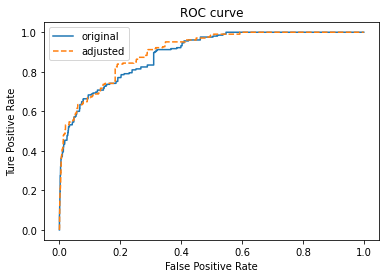

In [24]:
plt.plot(fpr,tpr)
plt.plot(fpr1,tpr1,linestyle = '--')
plt.title('ROC curve')
plt.legend(['original','adjusted'])
plt.xlabel('False Positive Rate')
plt.ylabel('Ture Positive Rate')
plt.show()

In [25]:
score2 = roc_auc_score(y_test,y_pred_proba[:,1])
print(score2)

0.9046023469774507


# 结构图导出

In [41]:
digraph_best = xgb.to_graphviz(model_best, num_trees=0) 
digraph_best.format = 'png'
digraph_best.view('./XGBoost_best')

'.\\XGBoost_best.png'

# 树结构导出

In [42]:
from sklearn.tree import export_graphviz
import os
os.environ['PATH'] = os.pathsep + r'F:\graphviz\Graphviz2.38\bin'

In [64]:
digraph = xgb.to_graphviz(model_best,num_trees = 0)
digraph.format = 'png'
digraph.view('./xgboost')

'.\\xgboost.png'